In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('datasets/GTZAN/features_3_sec.csv')

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label']) #encoding the label column ie the genre

In [22]:
cols=list(df.columns)
print(cols)
train_cols=cols[1:-1]
test_cols=cols[-1]
print(train_cols)
print(len(train_cols))

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']
['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[train_cols]) #Normalizing the given data
df[train_cols]=scaler.transform(df[train_cols])
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,0.0,-0.487808,0.640520,-0.006624,0.235568,-0.566828,-0.572791,-0.493983,-0.009229,...,-0.299108,0.168647,-0.425137,-0.003423,-0.376938,-0.499464,-0.513562,0.128414,-0.291781,0
1,blues.00000.1.wav,0.0,-0.403142,0.131835,-0.264944,-0.342134,-0.508798,-0.749862,-0.425382,-0.519010,...,0.428544,-0.327031,-0.310040,-0.112125,-0.032083,-0.066593,1.011384,1.275780,0.056425,0
2,blues.00000.2.wav,0.0,-0.361694,0.764491,0.016695,0.542195,-0.546245,-0.701852,-0.288365,-0.425734,...,0.503695,0.428053,-0.648762,0.316311,-0.177372,0.109337,-0.046244,0.653907,-0.521458,0
3,blues.00000.3.wav,0.0,-0.175714,0.205477,0.024885,-0.063820,-0.723482,-0.700599,-0.517344,-0.348881,...,-0.065309,0.062981,-0.649076,0.092384,-0.464121,-0.211882,-0.099501,0.865880,-0.544744,0
4,blues.00000.4.wav,0.0,-0.485895,0.337521,0.181345,-0.272072,-0.756246,-0.774827,-0.538557,-0.572962,...,-0.570609,0.856651,-0.167089,0.183265,-0.029476,-0.175130,-0.678995,0.276899,-0.606692,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df[train_cols],df[test_cols],test_size=0.2)
from sklearn.feature_selection import f_classif, SelectKBest
sel_f = SelectKBest(f_classif, k=30)    # select 30 features
X_train_chi2 = sel_f.fit_transform(X_train, y_train) #selecting best 30 features
print(sel_f.get_support())
lsb=sel_f.get_support()
ls=[]
for i in range(len(train_cols)):
  if lsb[i]==True:
    ls.append(train_cols[i])
print(ls)
train_cols=ls
X_train, X_test, y_train, y_test=train_test_split(df[train_cols],df[test_cols],test_size=0.2)
print(X_train.shape)

[False  True  True  True  True  True  True  True False  True  True  True
  True False False False  True False  True False  True False  True False
  True  True  True  True  True  True  True  True  True False  True False
  True False False False  True False  True False False False  True False
 False False  True False False False False False False False]
['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'perceptr_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc15_mean', 'mfcc17_mean']
(7992, 30)


/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [25]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, classification_report
def model_assess(model, title = "Default"):
    y_pred = model.predict(X_test)
    print(title, ':')
    # # predict classes on testing data
    cm = confusion_matrix(y_test, y_pred)

    # # plotting conf matrix using seaborn
    plt.figure(figsize = (10,7))
    mask = np.triu(np.ones_like(cm, dtype=np.bool))
    sns.heatmap(cm, mask=mask, vmax=30, center=0,annot=True)
    # plt.savefig("")

    # Predict accuracy,precision_score,recall_score
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print(f"Overall Precision: {precision_score(y_test, y_pred,average='macro')}")
    print(f"Overall Recall:{recall_score(y_test, y_pred,average='macro')}")
    # Print classification Report
    print(classification_report(y_test, y_pred))

# K Nearest Neighbors Classifier

## Basic sklearn KNN

Default :
Accuracy score: 0.8708708708708709
Overall Precision: 0.8733693484899305
Overall Recall:0.8711782026612752
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       191
           1       0.90      0.96      0.93       214
           2       0.77      0.84      0.80       193
           3       0.82      0.87      0.84       202
           4       0.92      0.87      0.89       201
           5       0.87      0.86      0.86       202
           6       0.96      0.92      0.94       187
           7       0.88      0.84      0.86       177
           8       0.84      0.90      0.87       211
           9       0.89      0.76      0.82       220

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



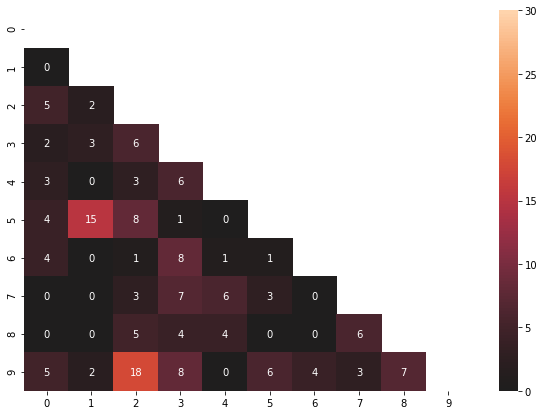

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
simpleknn=KNeighborsClassifier(n_neighbors=5) #only 5 neighbors
simpleknn.fit(X_train,y_train)
model_assess(simpleknn)

## Using Grid Search CV

In [27]:
n=len(set(y_train))
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params_KNN = {'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan'],
              'n_neighbors':list(range(1,20))
              }                                     #setting param grid
modelk=KNeighborsClassifier()
gs_KNN=GridSearchCV(estimator=modelk,
                    param_grid=params_KNN,
                    verbose=1, 
                    scoring='accuracy')
gs_KNN.fit(X_train,y_train)
print(gs_KNN.best_params_)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


KNN GridsearchCV :
Accuracy score: 0.9059059059059059
Overall Precision: 0.9073617032054686
Overall Recall:0.905944266718195
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       191
           1       0.94      0.96      0.95       214
           2       0.82      0.82      0.82       193
           3       0.87      0.91      0.89       202
           4       0.95      0.94      0.95       201
           5       0.91      0.90      0.91       202
           6       0.96      0.97      0.97       187
           7       0.95      0.89      0.92       177
           8       0.89      0.94      0.91       211
           9       0.85      0.83      0.84       220

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



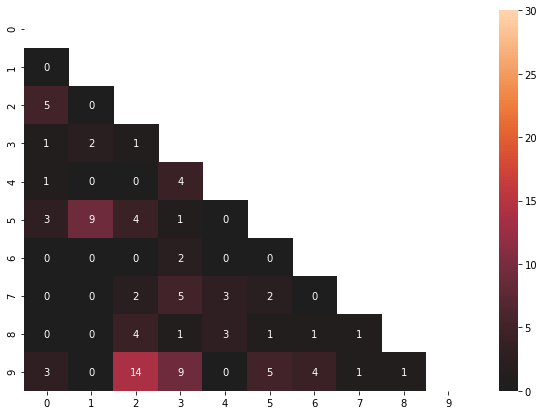

In [39]:
model_assess(gs_KNN.best_estimator_,"KNN GridsearchCV")

## Drawing the ROC curve

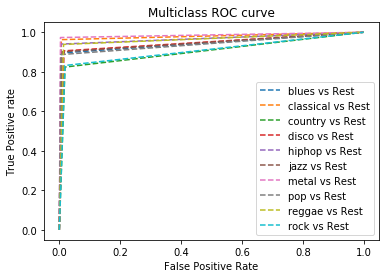

In [40]:
from sklearn.metrics import roc_curve
def ROC(model):
    pred_prob = model.predict_proba(X_test)
    classes=['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
    # Get ROC metrics for each class
    fpr = {}
    tpr = {}
    thresh ={}
    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

    # Plot the ROC chart
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], linestyle='--', label=classes[i] + ' vs Rest')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
ROC(gs_KNN.best_estimator_)

# Gaussian Naive Bayes

## Simple and One vs Rest Gaussian NB

Simple Gaussian NB :
Accuracy score: 0.46896896896896895
Overall Precision: 0.4606482379884576
Overall Recall:0.4755693757933862
              precision    recall  f1-score   support

           0       0.39      0.46      0.42       191
           1       0.68      0.88      0.77       214
           2       0.34      0.29      0.31       193
           3       0.39      0.27      0.32       202
           4       0.65      0.30      0.41       201
           5       0.49      0.39      0.43       202
           6       0.45      0.87      0.59       187
           7       0.45      0.76      0.57       177
           8       0.52      0.41      0.46       211
           9       0.26      0.12      0.17       220

    accuracy                           0.47      1998
   macro avg       0.46      0.48      0.44      1998
weighted avg       0.46      0.47      0.44      1998

One Vs Rest :
Accuracy score: 0.46646646646646645
Overall Precision: 0.45681941758051003
Overall Recall:0.473232

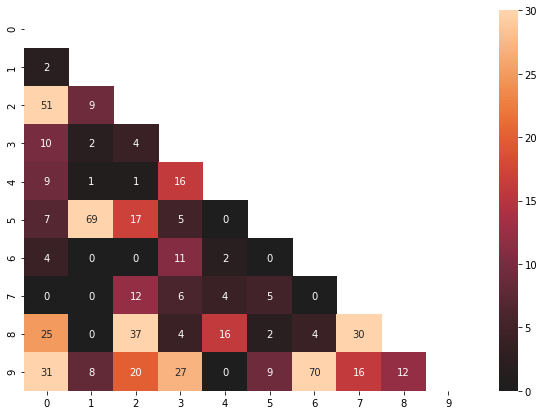

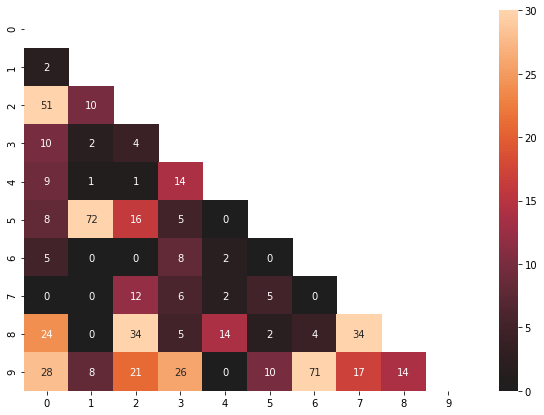

In [41]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
model_assess(gnb,"Simple Gaussian NB")
clf = OneVsRestClassifier(GaussianNB()).fit(X_train,y_train)
model_assess(clf,"One Vs Rest")

## Grid Search Gaussian Naive Bayes

In [31]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,    # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 8.111308307896872e-05}

GaussianNB GridSearchCV :
Accuracy score: 0.46896896896896895
Overall Precision: 0.4606482379884576
Overall Recall:0.4755693757933862
              precision    recall  f1-score   support

           0       0.39      0.46      0.42       191
           1       0.68      0.88      0.77       214
           2       0.34      0.29      0.31       193
           3       0.39      0.27      0.32       202
           4       0.65      0.30      0.41       201
           5       0.49      0.39      0.43       202
           6       0.45      0.87      0.59       187
           7       0.45      0.76      0.57       177
           8       0.52      0.41      0.46       211
           9       0.26      0.12      0.17       220

    accuracy                           0.47      1998
   macro avg       0.46      0.48      0.44      1998
weighted avg       0.46      0.47      0.44      1998



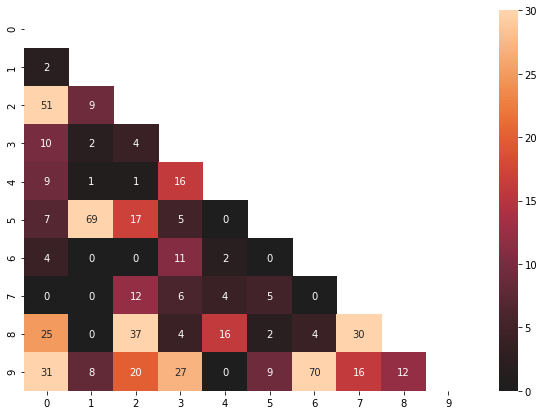

In [42]:
model_assess(gs_NB.best_estimator_,"GaussianNB GridSearchCV")

## ROC for Grid Search NB

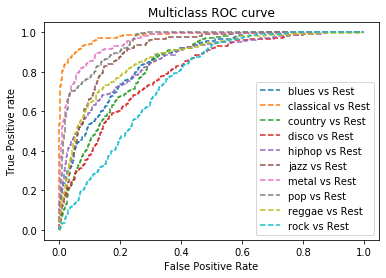

In [35]:
ROC(gs_NB)

# SGD Classifier

## Simple SGD

Default :
Accuracy score: 0.6041041041041041
Overall Precision: 0.5972550877132848
Overall Recall:0.6103587617280029
              precision    recall  f1-score   support

           0       0.51      0.74      0.60       191
           1       0.90      0.92      0.91       214
           2       0.46      0.59      0.52       193
           3       0.51      0.49      0.50       202
           4       0.53      0.55      0.54       201
           5       0.67      0.62      0.65       202
           6       0.73      0.87      0.80       187
           7       0.85      0.67      0.75       177
           8       0.49      0.56      0.52       211
           9       0.31      0.09      0.14       220

    accuracy                           0.60      1998
   macro avg       0.60      0.61      0.59      1998
weighted avg       0.59      0.60      0.59      1998



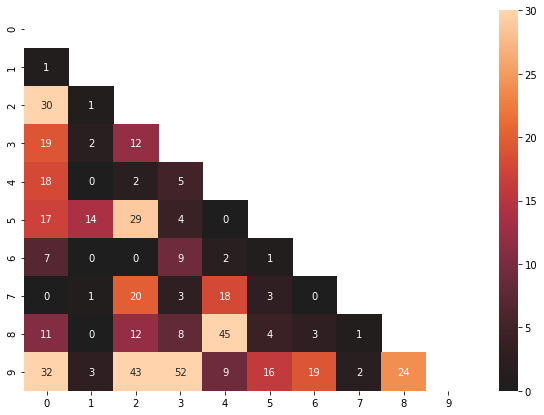

In [36]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
model_assess(sgd)

In [43]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.001, 0.01, 0.1, 1, 10, 100] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 

param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate)

In [44]:
model_sgd=GridSearchCV(estimator=SGDClassifier(), 
                      param_grid=param_distributions, 
                      scoring='accuracy', 
                      verbose=1)
model_sgd.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/ashita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/as

In [ ]:
model_assess(model_sgd.best_estimator_,"SGD classifier")

SGD classifier :
Accuracy score: 0.6441441441441441
Overall Precision: 0.6386137102787109
Overall Recall:0.6421140902032518
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       195
           1       0.89      0.93      0.91       199
           2       0.52      0.49      0.51       194
           3       0.52      0.53      0.53       203
           4       0.62      0.59      0.61       201
           5       0.65      0.69      0.67       186
           6       0.82      0.82      0.82       208
           7       0.73      0.75      0.74       202
           8       0.58      0.61      0.60       223
           9       0.47      0.36      0.41       187

    accuracy                           0.64      1998
   macro avg       0.64      0.64      0.64      1998
weighted avg       0.64      0.64      0.64      1998



## ROC for SGD

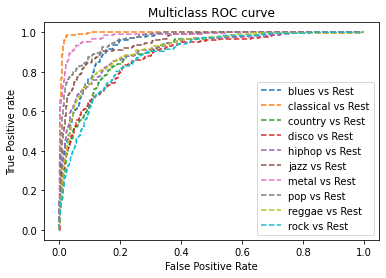

In [ ]:
ROC(model_sgd.best_estimator_)

## Best Model :
- KNN with GridSearch Accuracy: 90%
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}